In [48]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from numpy.linalg import cholesky
import os
from pandas.plotting import autocorrelation_plot
from matplotlib.dates import DateFormatter


import warnings
import itertools

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import scipy.integrate as integrate
import scipy.special as special

In [49]:
wages_path = 'wages.xlsx'

wages = pd.read_excel(wages_path, engine='openpyxl', usecols = ['time','NSW','VIC','QLD','SA','WA','TAS','NT','ACT'])
wages = pd.DataFrame(wages)
wages = wages.set_index('time').asfreq('QS-DEC')

# Read the Excel file into a pandas DataFrame
wages_pre_covid =wages.iloc[:40]


In [50]:
wages_nsw = wages['NSW']
wages_vic = wages['VIC']
wages_qld = wages['QLD']
wages_sa = wages['SA']
wages_wa = wages['WA']
wages_tas = wages['TAS']
wages_nt = wages['NT']
wages_act = wages['ACT']

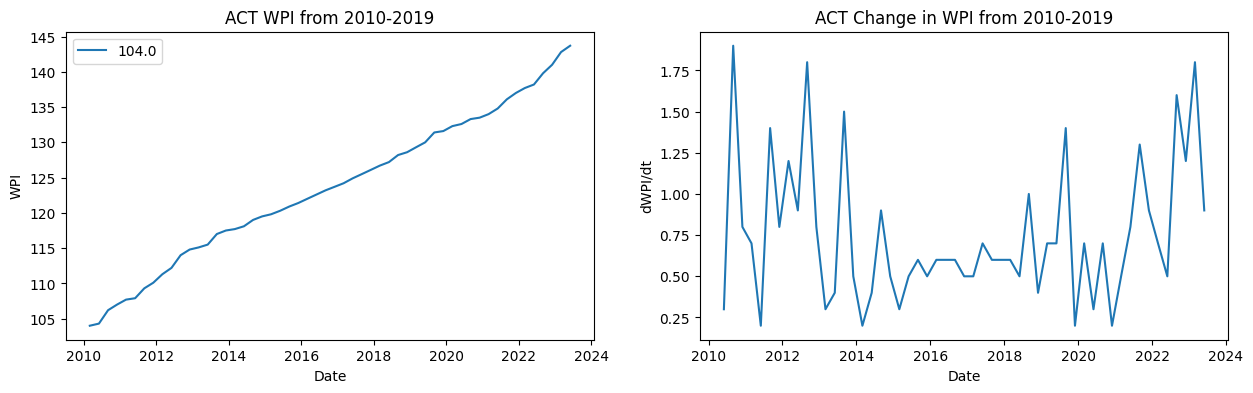

In [53]:
wages = wages.iloc[20:]

f = plt.figure()
f.set_figheight(4)
f.set_figwidth(15)
ax1 = f.add_subplot(121)
ax1.set_title('ACT WPI from 2010-2019')
ax1.set_xlabel('Date')
ax1.set_ylabel('WPI')
ax1.plot(wages_act)
ax1.legend(wages_act, loc='best')

wages_change = wages_act.diff().dropna()
ax2 = f.add_subplot(122)
ax2.set_title('ACT Change in WPI from 2010-2019')
ax2.set_xlabel('Date')
ax2.set_ylabel('dWPI/dt')
ax2.xaxis.set_major_formatter(DateFormatter("%Y"))
ax2.plot(wages_change)


plt.savefig('ACT data overview.png')


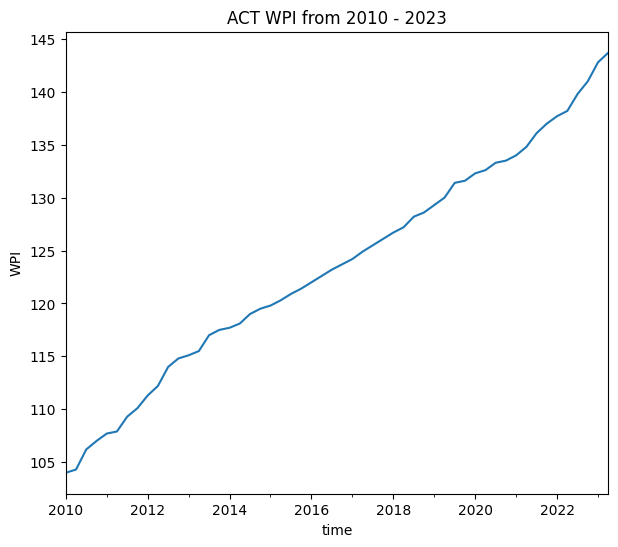

In [46]:
wages_act.plot(figsize=(7, 6),
               title = 'ACT WPI from 2010 - 2023',
                ylabel = 'WPI'
                 )
plt.savefig('ACT PWI.png')

In [23]:
wages_pre_covid_nsw = wages_pre_covid['NSW']
wages_pre_covid_vic = wages_pre_covid['VIC']
wages_pre_covid_qld = wages_pre_covid['QLD']
wages_pre_covid_sa = wages_pre_covid['SA']
wages_pre_covid_wa = wages_pre_covid['WA']
wages_pre_covid_tas = wages_pre_covid['TAS']
wages_pre_covid_nt = wages_pre_covid['NT']
wages_pre_covid_act = wages_pre_covid['ACT']


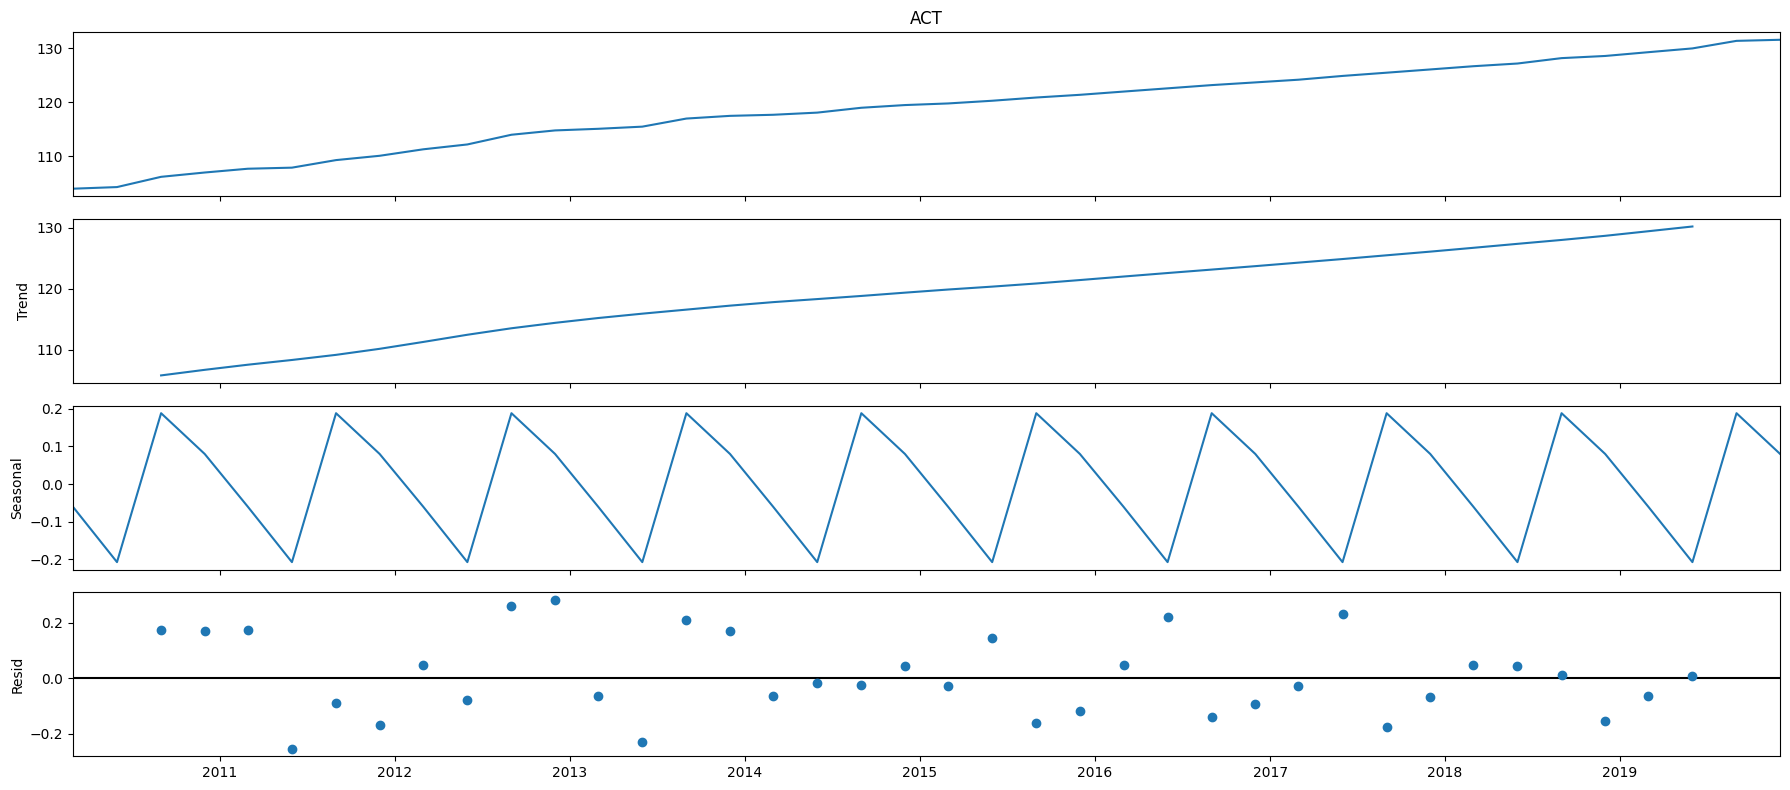

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(wages_pre_covid_act, model='additive')
decomposition.plot()
plt.show()

Time series forecasting with ARIMA


In [25]:
def adfuller_test(wage):
    result=adfuller(wage)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(wages_pre_covid_wa)

ADF Test Statistic : -1.2284133518316291
p-value : 0.661255161526541
#Lags Used : 4
Number of Observations : 35
weak evidence against null hypothesis,indicating it is non-stationary 


In [26]:
wages_pre_covid_act = wages_pre_covid_act.diff().dropna()

In [27]:
def adfuller_test(wage):
    result=adfuller(wage)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(wages_pre_covid_wa)

ADF Test Statistic : -1.2284133518316291
p-value : 0.661255161526541
#Lags Used : 4
Number of Observations : 35
weak evidence against null hypothesis,indicating it is non-stationary 


In [28]:
wages_pre_covid_act = wages_pre_covid_act.diff().dropna()

In [29]:
def adfuller_test(wage):
    result=adfuller(wage)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(wages_pre_covid_wa)

ADF Test Statistic : -1.2284133518316291
p-value : 0.661255161526541
#Lags Used : 4
Number of Observations : 35
weak evidence against null hypothesis,indicating it is non-stationary 


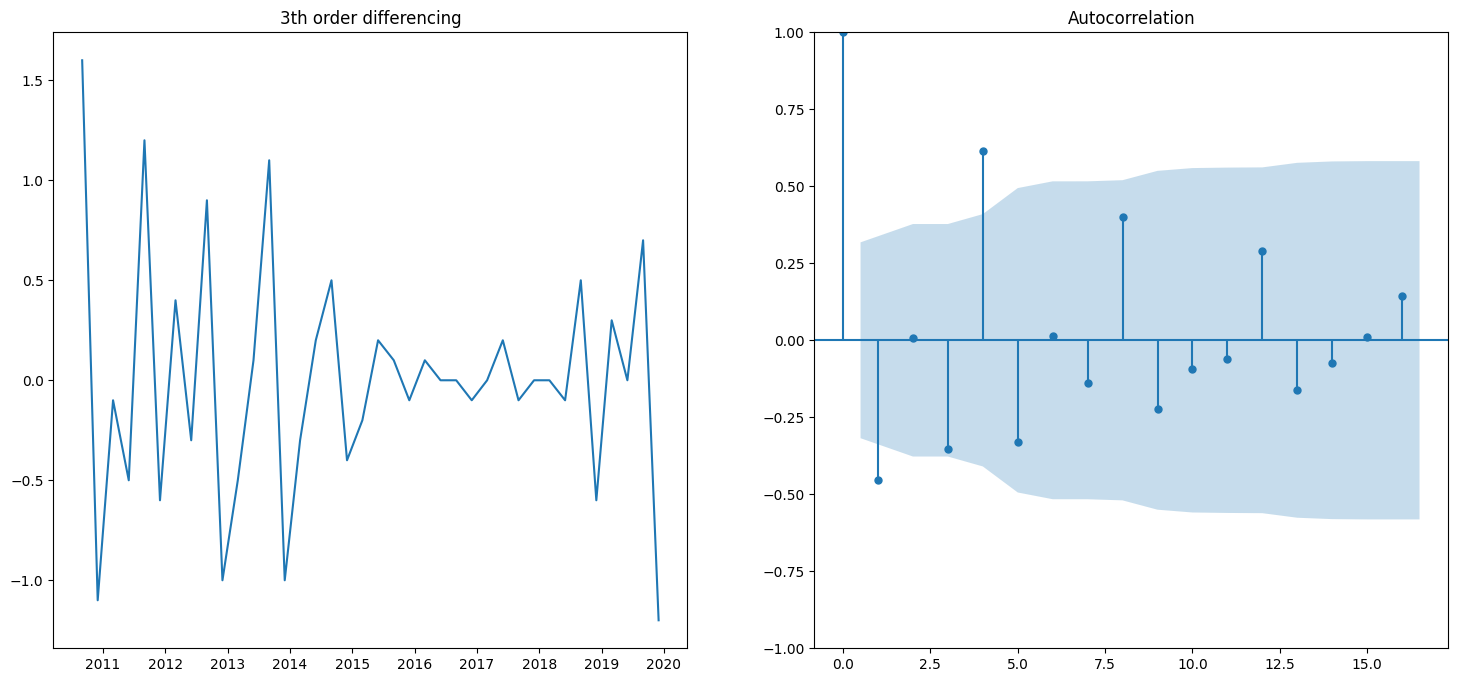

In [30]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('3th order differencing')
ax1.plot(wages_pre_covid_act)

ax2 = f.add_subplot(122)
plot_acf(wages_pre_covid_act, ax=ax2)
plt.show()

As from the above observation, after the 4 order differencing, the p-value drops beyond the threshold order and shows strong evidence against the null hypothesis, sp taking "d" as 3. 

We see the 1 lag is the most significant. so p is 1.

There are 4 lags crossed the threshold, so q is 4.


In [13]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
                
for param_seasonal in seasonal_pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(wages_pre_covid_wa,
                                            order=(1, 3, 4),
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        results  = mod.fit()
        print('ARIMA(1, 3, 4)x{}12 - AIC:{}'.format(param_seasonal, results.aic))
    except:
        continue

ARIMA(1, 3, 4)x(0, 0, 0, 12)12 - AIC:16.499616681974647
ARIMA(1, 3, 4)x(0, 0, 1, 12)12 - AIC:17.535815314182614


E:\Uni\research\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 3, 4)x(0, 1, 0, 12)12 - AIC:20.726759964098374
ARIMA(1, 3, 4)x(0, 1, 1, 12)12 - AIC:13.938449776736569


E:\Uni\research\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 3, 4)x(1, 0, 0, 12)12 - AIC:26.70336805930267
ARIMA(1, 3, 4)x(1, 0, 1, 12)12 - AIC:18.129141699790424


E:\Uni\research\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
E:\Uni\research\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Uni\research\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Uni\research\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate st

ARIMA(1, 3, 4)x(1, 1, 0, 12)12 - AIC:17.88160420471526
ARIMA(1, 3, 4)x(1, 1, 1, 12)12 - AIC:16.942651740292852


In [14]:
#(p, d, q)

mod = sm.tsa.statespace.SARIMAX(wages_pre_covid_wa,
                                order=(1, 3, 4),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

E:\Uni\research\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8350      0.348     -2.399      0.016      -1.517      -0.153
ma.L1         -2.2862    180.830     -0.013      0.990    -356.707     352.134
ma.L2          1.0553    235.264      0.004      0.996    -460.054     462.165
ma.L3          0.8611     43.298      0.020      0.984     -84.001      85.723
ma.L4         -0.6304    114.731     -0.005      0.996    -225.498     224.237
ma.S.L12      -0.0845      0.721     -0.117      0.907      -1.498       1.329
sigma2         0.0849     15.432      0.006      0.996     -30.162      30.332


E:\Uni\research\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


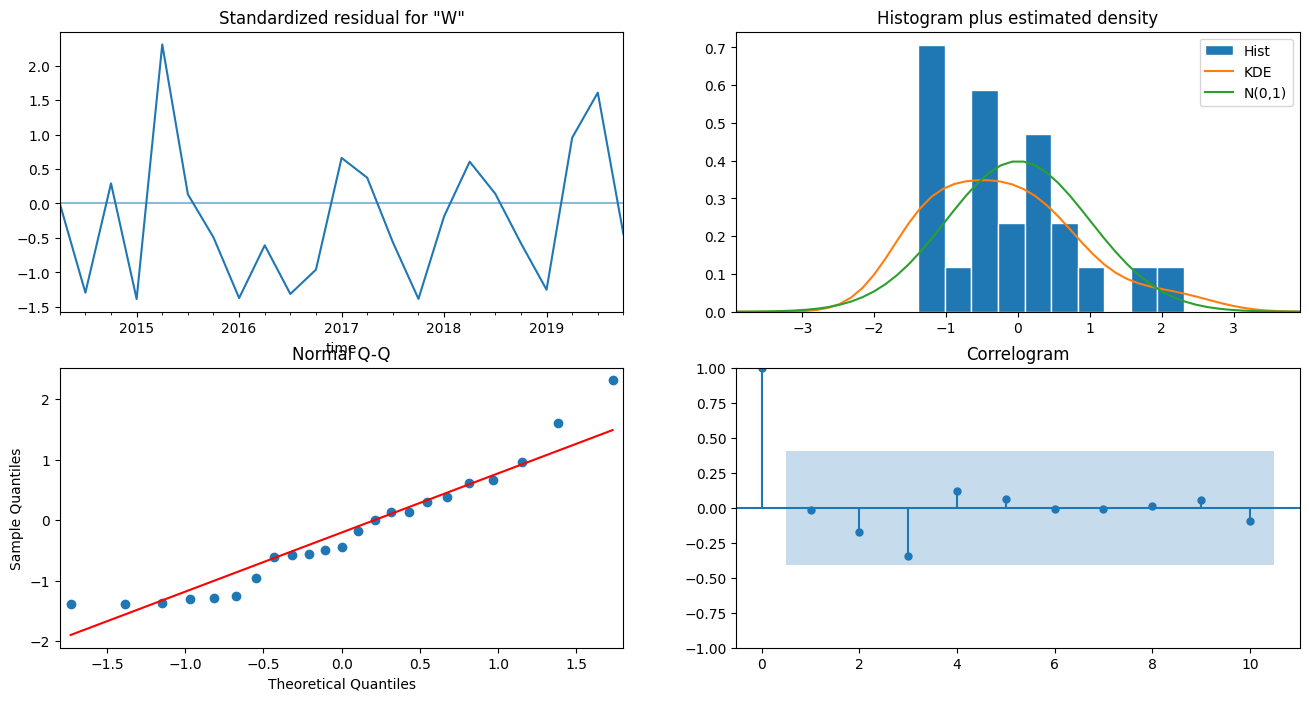

In [15]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

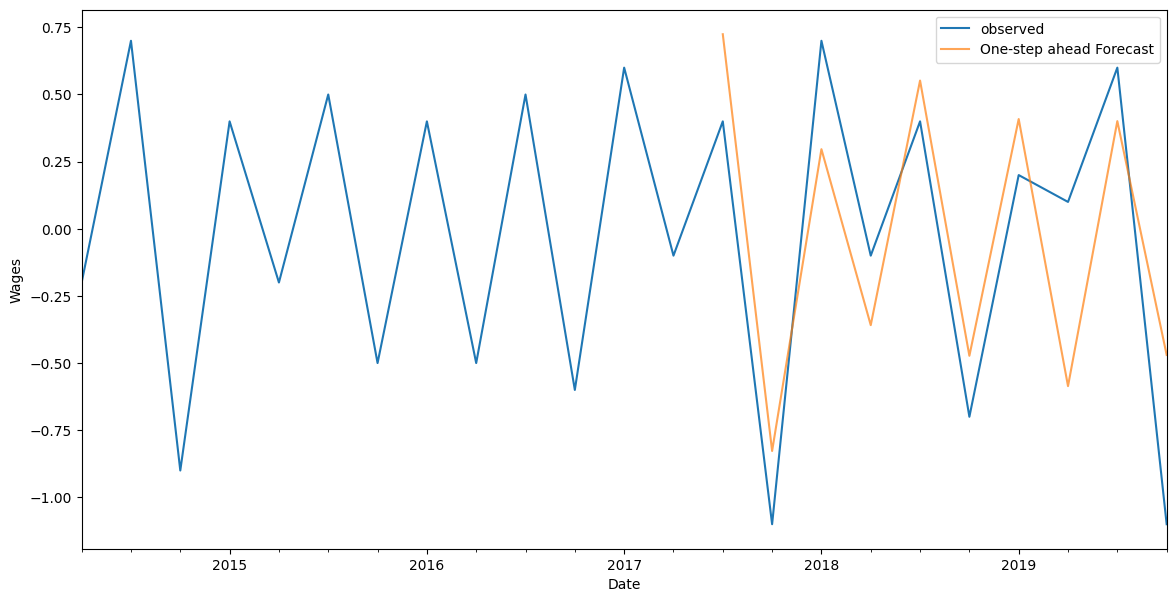

In [16]:
pred = results.get_prediction(start=pd.to_datetime('2017-06-01'), dynamic=False)
pred_ci = pred.conf_int().diff().dropna()
ax = wages_pre_covid_wa['2014':].diff().dropna().plot(label='observed')

pred.predicted_mean.diff().dropna().plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.set_xlabel('Date')
ax.set_ylabel('Wages')
plt.legend()
plt.show()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4821      0.232     -2.080      0.038      -0.936      -0.028
ar.L2         -0.2348      0.198     -1.188      0.235      -0.622       0.152
ar.L3         -0.4497      0.244     -1.839      0.066      -0.929       0.029
ar.L4          0.2175      0.241      0.902      0.367      -0.255       0.690
ma.L1         -1.0001    118.638     -0.008      0.993    -233.526     231.526
sigma2         0.0450      5.341      0.008      0.993     -10.423      10.513
            lower WA  upper WA  Predictions
2020-03-01  0.128198  0.970743     0.549471
2020-06-01 -0.135305  0.823818     0.344256
2020-09-01  0.224587  1.291446     0.758016
2020-12-01 -0.095202  0.988812     0.446805
2021-03-01 -0.072028  1.219630     0.573801
2021-06-01 -0.358426  1.010438     0.326006
2021-09-01 -0.130453  1.363802     0.616674
2021-12-01 -0.38

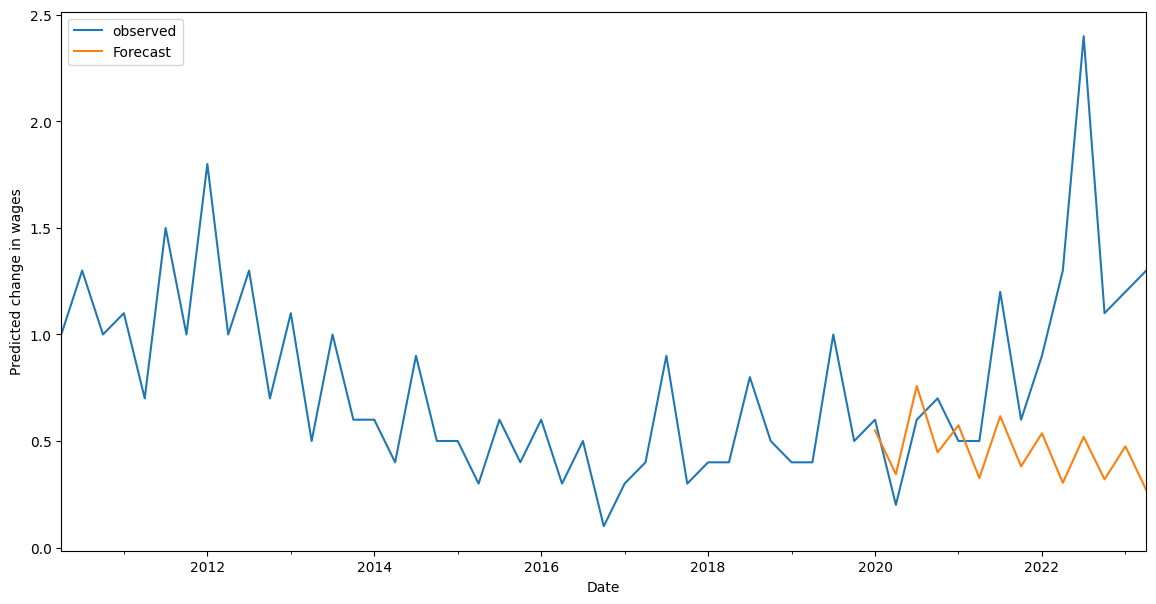

In [17]:
wages_pre_covid_wa = wages_pre_covid['WA']
wages_pre_covid_wa = wages_pre_covid_wa.diff().dropna()

mod = sm.tsa.statespace.SARIMAX(wages_pre_covid_wa,
                                order=(4, 2, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

pred_uc = results.get_forecast(steps=14)
pred_ci = pred_uc.conf_int()
ax = wages_wa.diff().dropna().plot(label='observed', figsize=(14, 7))

pred_ci["Predictions"] = pred_uc.predicted_mean
print(pred_ci)

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Predicted change in wages')
plt.legend()
plt.show()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6667      1.073     -0.621      0.534      -2.770       1.436
ar.L2         -0.3480      0.627     -0.555      0.579      -1.578       0.882
ar.L3         -0.5072      0.335     -1.513      0.130      -1.164       0.150
ar.L4          0.1065      0.631      0.169      0.866      -1.130       1.343
ma.L1          0.1783      1.047      0.170      0.865      -1.873       2.230
sigma2         0.0445      0.011      4.054      0.000       0.023       0.066
              lower WA    upper WA  Predictions
2020-03-01  131.067737  131.894939   131.481338
2020-06-01  131.128524  132.627721   131.878122
2020-09-01  131.570606  133.803669   132.687138
2020-12-01  131.759135  134.622952   133.191044
2021-03-01  131.986276  135.728087   133.857181
2021-06-01  131.966472  136.618721   134.292596
2021-09-01  132.183484  137.8645

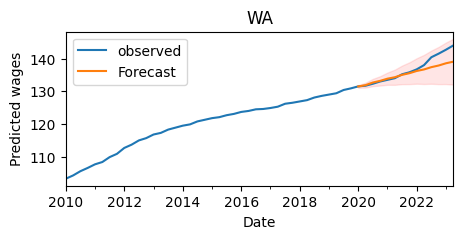

In [20]:
wages_pre_covid_wa = wages_pre_covid['WA']

mod = sm.tsa.statespace.SARIMAX(wages_pre_covid_wa,
                                order=(4, 2, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

pred_uc = results.get_forecast(steps=14)
pred_ci = pred_uc.conf_int()
ax = wages_wa.plot(label='observed', figsize=(5, 2))
ax.fill_between(
    pred_ci.index, pred_ci['lower WA'], pred_ci['upper WA'],
    color='r', alpha=0.1
)
pred_ci["Predictions"] = pred_uc.predicted_mean
print(pred_ci)

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Predicted wages')
plt.legend()
plt.title('WA')

plt.savefig('WA predicted PWI.png')

plt.show()